### Analyze simulation results, making plots

In [1]:
import numpy as np

import matplotlib.pyplot as plt
from collections import Counter

def calculate_cdf(data):
    sorted_data = np.sort(data)
    cdf = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
    return sorted_data, cdf
    
def draw_3cdf(x, y, z, label1, label2, label3, title_setting):
    # Calculate the CDF for both arrays
    x_sorted, x_cdf = calculate_cdf(x)
    y_sorted, y_cdf = calculate_cdf(y)
    z_sorted, z_cdf = calculate_cdf(z)
    
    # Plot the CDF for both arrays
    plt.figure(figsize=(8, 5))
    plt.plot(x_sorted, x_cdf, label=label1, color='deepskyblue')
    plt.plot(y_sorted, y_cdf, label=label2, color='darkorange')
    plt.plot(z_sorted, z_cdf, label=label3, color='green')
    
    # Add labels and title
    plt.xlabel('Rank')
    plt.ylabel('Cumulative Proportion')
    plt.title("CDF of the root cause rank " + title_setting)
    plt.legend(loc='lower right')
    plt.grid(True)

    plt.savefig(title_setting+".png")
    
    plt.show()

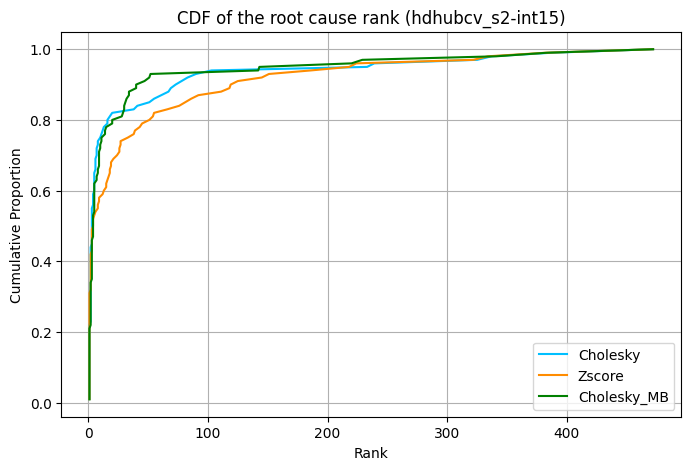

[37. 10. 35. 11. 22. 11. 20. 10. 36. 37. 41. 23. 11. 16. 40. 11. 26. 47.
 59. 28. 24.  8. 14. 18. 30.  3.  8. 16. 17. 32. 30. 12.  6. 16. 13. 10.
 23. 47. 28. 44. 48. 12. 11. 50.  6. 12. 11. 14. 19. 38. 16. 52. 34. 49.
 52. 15. 23. 17. 24.  5. 76. 45. 16. 14. 40. 33. 20. 32. 43.  4. 17. 13.
 30.  8. 25. 17. 36. 40. 12. 29. 17. 21. 33. 28.  3. 25. 15. 22. 18. 20.
  8. 30.  9. 65. 17.  7.  7. 35. 52. 27.]
[40.  9. 10. 40. 40. 40.  3. 40. 10. 14. 40. 62. 71.  5. 40. 40. 71. 40.
  9. 71. 40. 40. 40.  5. 10. 13. 10. 71. 40. 71. 71. 16.  6. 71.  3. 13.
 71. 40. 62. 40. 40. 13. 17. 40. 71.  6.  6.  7. 18. 62. 71. 40. 40. 77.
 40. 14. 15.  5. 71. 40.  9.  9. 40. 10. 40. 40. 71. 40. 15.  6. 40.  4.
 71. 14. 40. 71. 40. 71. 71. 62. 40. 71. 40. 40. 40.  8. 40. 40. 62. 11.
  2. 40. 71.  6. 40.  6. 40. 40. 71.  9.]


In [2]:
s_B_vec = [0.2]
int_mean_vec = [15]
seedB_all = 5
seedm_all = 20

for s_B in s_B_vec:
    for int_mean in int_mean_vec:
        RC_list = []
        Zscores_list = []
        CholScores_highdim_list = []
        CholScores_highdim_MB_list = []
        select_len_list = []
        select_len_MB_list = []
        for seedB in range(seedB_all):
            for seedm in range(seedm_all):
                result_temp = np.load(f"results/hdhubcv_s{int(s_B*10)}int{int_mean}seedB{seedB}seedm{seedm}.npz")

                RC_list.append(result_temp['array1'][0])
                Zscores_list.append(result_temp['array2'])
                CholScores_highdim_list.append(result_temp['array3'])
                CholScores_highdim_MB_list.append(result_temp['array4'])
                select_len_list.append(result_temp['array5'][result_temp['array1'][0]])
                select_len_MB_list.append(result_temp['array6'][result_temp['array1'][0]])
                
        RC = np.array(RC_list)
        Zscores = np.vstack(Zscores_list)
        CholScores_highdim = np.vstack(CholScores_highdim_list)
        CholScores_highdim_MB = np.vstack(CholScores_highdim_MB_list)
        select_len = np.array(select_len_list)
        select_len_MB = np.array(select_len_MB_list)
        
        RC_rank_Zscore = [np.sum(Zscores[i,int(RC[i])] < Zscores[i,:]) for i in range(Zscores.shape[0])]
        RC_rank_Chol = [np.sum(CholScores_highdim[i,int(RC[i])] < CholScores_highdim[i,:]) for i in range(CholScores_highdim.shape[0])]
        RC_rank_Chol_MB = [np.sum(CholScores_highdim_MB[i,int(RC[i])] < CholScores_highdim_MB[i,:]) for i in range(CholScores_highdim_MB.shape[0])]
        
        RC_rank_Zscore_add1 = [i+1 for i in RC_rank_Zscore]
        RC_rank_Chol_add1 = [i+1 for i in RC_rank_Chol]
        RC_rank_Chol_MB_add1 = [i+1 for i in RC_rank_Chol_MB]

        title_setting = f"(hdhubcv_s{int(s_B*10)}-int{int_mean})"
        draw_3cdf(RC_rank_Chol_add1, RC_rank_Zscore_add1, RC_rank_Chol_MB_add1, 'Cholesky', 'Zscore', 'Cholesky_MB',title_setting)
         
        # the number of selected variables when treating RC as response
        print(select_len)
        # the number of true MB when treating RC as response
        print(select_len_MB)